### Name: Riad Mohammed
### Project: 1
### Course: Machine Learning 
### Due Date: April 8th, 2023

## PROBLEM STATEMENT

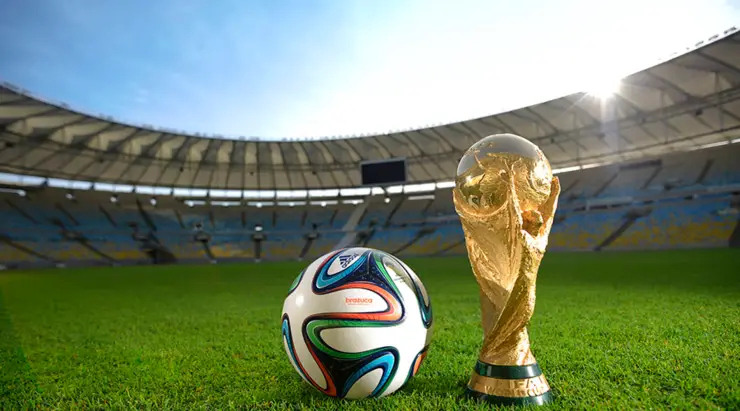

### The FIFA World Cup is a quadrennial international football (soccer) tournament organized by the Fédération Internationale de Football Association (FIFA). It brings together national teams from around the world to compete in a month-long event that generates significant global interest, economic activity, and cultural exchange. It is the most widely viewed and followed sporting event in the world, with an estimated global audience of over 3.5 billion people. As a result, the FIFA World Cup is very influencial to the majoirty of lives on this planet, because it impacts individuals on way or the other. Consequently, I have decided to choose this global event as my area of analysis due to this international intrigue and also my personal attachment to the sport. 

### With respect to the study, I would be predicting the winner of the FIFA World Cup using the concepts of Machine Learning. This will not only benefit my individual interest and curiousity but can also benefit a myriad of businesses. It can help individuals and organizations make informed decisions related to betting, sponsorship, and marketing activities associated with the tournament. Accurate predictions can also be useful for media outlets, allowing them to produce compelling stories and coverage around the event. Moreover, accurate predictions can be valuable for national teams, helping them to strategize and prepare for the tournament. Additionally, the ability to accurately predict the tournament's outcome can be an important demonstration of the effectiveness of machine learning algorithms and can drive innovation in the field of sports analytics.


### The dataset includes:
      
###                   1) International football results  from 1872 to 2022 : This dataset includes 44,341 results of international football matches starting from the very first official match in 1872 up to 2022. The matches range from FIFA World Cup to FIFI Wild Cup to regular friendly matches. The matches are strictly men's full internationals and the data does not include Olympic Games or matches where at least one of the teams was the nation's B-team, U-23 or a league select team.

###                   2) FIFA World Ranking 1992-2022 Dataset: This dataset includes the official FIFA ranking of all the participating countries in the realm of world football.

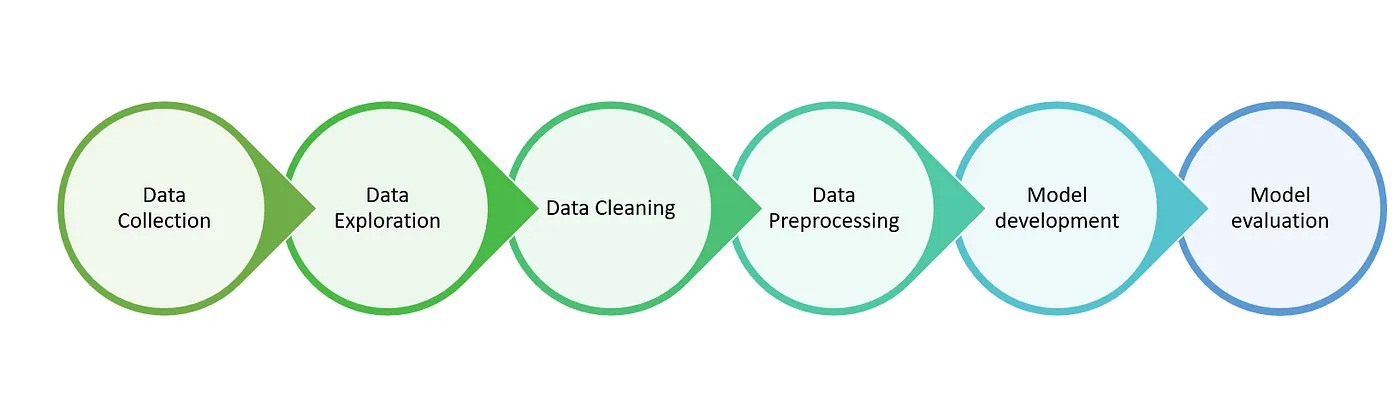

## Data Collection, Data Exploration, Data Cleaning and Data Preprocessing

In [1]:
import pandas as pd
import re

In [2]:
#Reading in all the match set data from International football 1872 to 2022

match_results = pd.read_csv("results.csv")  
match_results["date"] = pd.to_datetime(match_results["date"]) #Converts date object to datetime for ease of manipulation
match_results = match_results[(match_results["date"] >= "2018-8-1")].reset_index(drop=True) #Selects the teams for the World Cup 2022 cycle 

In [3]:
match_results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,2018-08-04,Belize,Barbados,1,0,Friendly,San Pedro,Belize,False
1,2018-08-04,Palestine,Iraq,0,3,Friendly,Al-Ram,Palestine,False
2,2018-08-15,Guatemala,Cuba,3,0,Friendly,Guatemala City,Guatemala,False
3,2018-08-18,Andorra,United Arab Emirates,0,0,Friendly,Grödig,Austria,True
4,2018-08-18,Grenada,Jamaica,1,5,Friendly,St. George's,Grenada,False
...,...,...,...,...,...,...,...,...,...
4126,2023-03-28,Haiti,Bermuda,3,1,CONCACAF Nations League,San Cristóbal,Dominican Republic,True
4127,2023-03-28,Guyana,Montserrat,0,0,CONCACAF Nations League,Bridgetown,Barbados,True
4128,2023-03-28,Bonaire,Turks and Caicos Islands,1,2,CONCACAF Nations League,Rincon,Bonaire,False
4129,2023-03-28,United States Virgin Islands,Sint Maarten,1,2,CONCACAF Nations League,Saint Croix,United States Virgin Islands,False


In [4]:
rank = pd.read_csv("fifa_ranking-2022-12-22.csv") #Ranking of all countries in the World
rank["rank_date"] = pd.to_datetime(rank["rank_date"]) #Converts date object to datetime for ease of manipulation
rank = rank[(rank["rank_date"] >= "2018-8-1")].reset_index(drop=True) #Selects the teams for the World Cup 2022 cycle
rank["country_full"] = rank["country_full"].str.replace("IR Iran", "Iran").str.replace("Korea Republic", "South Korea").str.replace("USA", "United States") #Standardises country names
rank = rank.set_index(['rank_date']).groupby(['country_full'], group_keys=False).resample('D').first().fillna(method='ffill').reset_index()


#Making the merge
world_cup_df = match_results.merge(rank[["country_full", "total_points", "previous_points", "rank", "rank_change", "rank_date"]], left_on=["date", "home_team"], right_on=["rank_date", "country_full"]).drop(["rank_date", "country_full"], axis=1)
world_cup_df = match_results.merge(rank[["country_full", "total_points", "previous_points", "rank", "rank_change", "rank_date"]], left_on=["date", "away_team"], right_on=["rank_date", "country_full"], suffixes=("_home", "_away")).drop(["rank_date", "country_full"], axis=1)

In [84]:
#Create a result column with W or L
#world_cup_df['result'] = world_cup_df.apply(lambda row: 'W' if row['home_score'] > row['away_score'] else 'L', axis=1)
world_cup_df['result'] = world_cup_df.apply(lambda row: 'W' if row['home_score'] > row['away_score'] else ('D' if row['home_score'] == row['away_score'] else 'L'), axis=1)


#Create a goal difference column
world_cup_df['goal_diff'] = world_cup_df.apply(lambda row: row['home_score'] - row['away_score'] if row['home_score'] > row['away_score'] else row['away_score'] - row['home_score'], axis=1)


world_cup_df['home_score'] = world_cup_df['home_score'].astype(int)
world_cup_df['away_score'] = world_cup_df['away_score'].astype(int)

In [253]:
#Convert away_team_code into unique categorial values
world_cup_df["away_team_code"] = world_cup_df['away_team'].astype("category").cat.codes

#Target asign to Win 
world_cup_df["target"] = (world_cup_df["result"]=="W").astype(int)
#world_cup_df["target"] = world_cup_df["result"].astype("category").cat.codes

In [254]:
#Displays final World Cup Dataframe to be used on the model
world_cup_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points,previous_points,rank,rank_change,result,goal_diff,away_team_code,target
0,2018-08-18,Andorra,United Arab Emirates,0,0,Friendly,Grödig,Austria,True,1312.00,1312.00,77.0,0.0,D,0,187,0
1,2018-08-18,Grenada,Jamaica,1,5,Friendly,St. George's,Grenada,False,1400.00,1400.00,54.0,0.0,L,4,90,0
2,2018-08-18,Guatemala,Cuba,1,0,Friendly,Quetzaltenango,Guatemala,False,940.00,940.00,181.0,0.0,W,1,45,1
3,2018-08-20,Barbados,Jamaica,2,2,Friendly,Bridgetown,Barbados,False,1400.00,1400.00,54.0,0.0,D,0,90,0
4,2018-08-22,Sint Maarten,Anguilla,1,1,Friendly,Philipsburg,Sint Maarten,False,868.00,868.00,206.0,0.0,D,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3662,2022-12-14,Malaysia,Maldives,3,0,Friendly,Kuala Lumpur,Malaysia,False,1026.09,1018.25,154.0,-2.0,W,3,110,1
3663,2022-12-14,Vietnam,Philippines,1,0,Friendly,Hanoi,Vietnam,False,1115.13,1115.13,133.0,-1.0,W,1,141,1
3664,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup,Al Rayyan,Qatar,True,1563.50,1558.35,22.0,-1.0,W,1,120,1
3665,2022-12-17,Singapore,Maldives,3,1,Friendly,Singapore,Singapore,False,1026.09,1018.25,154.0,-2.0,W,2,110,1


In [255]:
world_cup_df.corr()["target"]

home_score         0.622963
away_score        -0.493343
neutral           -0.090816
total_points      -0.247508
previous_points   -0.245254
rank               0.243907
rank_change        0.008554
goal_diff          0.336301
away_team_code    -0.007886
target             1.000000
Name: target, dtype: float64

<AxesSubplot:>

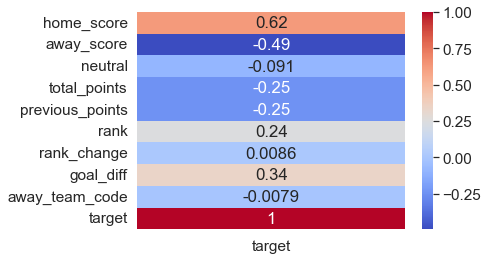

In [256]:
import seaborn as sns

# Compute correlation matrix
corr_matrix = world_cup_df.corr()

# Plot correlation heatmap
sns.heatmap(corr_matrix[["target"]], annot=True, cmap="coolwarm")

<AxesSubplot:>

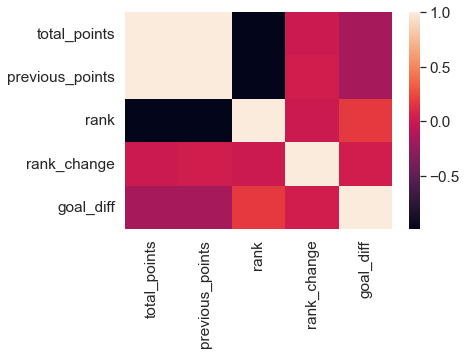

In [257]:
# select only the numeric columns
numeric_cols = world_cup_df.select_dtypes(include=['float64', 'int64']).columns

# create the correlation matrix with all valid elements
corr_matrix = world_cup_df[numeric_cols].corr(method='pearson', min_periods=1)

# print the correlation matrix
#print(corr_matrix)

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix)

# Show the plot
#plt.show()

In [258]:
world_cup_df.dtypes

date               datetime64[ns]
home_team                  object
away_team                  object
home_score                  int32
away_score                  int32
tournament                 object
city                       object
country                    object
neutral                      bool
total_points              float64
previous_points           float64
rank                      float64
rank_change               float64
result                     object
goal_diff                   int64
away_team_code              int16
target                      int32
dtype: object

## Model Development and Model Evaluation

In [358]:
#RandomForest picks up irregularities 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)
train = world_cup_df[world_cup_df["date"] < '2022-11-01']
test = world_cup_df[world_cup_df["date"] > '2022-11-01']
predictors = ["rank","rank_change","total_points","previous_points","goal_diff"] #Add goals scored and conceded
rf.fit(train[predictors], train["target"])
preds = rf.predict(test[predictors])
acc = accuracy_score(test["target"],preds)

In [360]:
precision_score(test["target"],preds)

0.6323529411764706

In [361]:
acc

0.6708074534161491

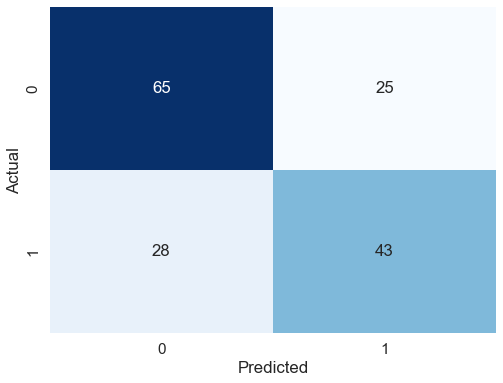

In [359]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

cm = confusion_matrix(test["target"], preds)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Improving Model

In [362]:
#Grouped matches to see a Team's recent rolling performance better
grouped_matches = world_cup_df.groupby("home_team")
group = grouped_matches.get_group("Argentina")
group

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points,previous_points,rank,rank_change,result,goal_diff,away_team_code,target
46,2018-09-07,Argentina,Guatemala,3,0,Friendly,Los Angeles,United States,True,1064.00,1064.00,146.0,0.0,W,3,75,1
155,2018-10-11,Argentina,Iraq,4,0,Friendly,Riyadh,Saudi Arabia,True,1272.00,1274.00,89.0,0.0,W,4,87,1
264,2018-10-16,Argentina,Brazil,0,1,Superclásico de las Américas,Jeddah,Saudi Arabia,True,1663.00,1657.00,3.0,0.0,L,1,27,0
306,2018-11-16,Argentina,Mexico,2,0,Friendly,Córdoba,Argentina,False,1549.00,1550.00,16.0,1.0,W,2,115,1
375,2018-11-20,Argentina,Mexico,2,0,Friendly,Mendoza,Argentina,False,1549.00,1550.00,16.0,1.0,W,2,115,1
512,2019-03-22,Argentina,Venezuela,1,3,Friendly,Madrid,Spain,True,1478.00,1478.00,32.0,1.0,L,2,192,0
669,2019-06-07,Argentina,Nicaragua,5,1,Friendly,San Juan,Argentina,False,1120.00,1119.00,129.0,1.0,W,4,128,1
753,2019-06-15,Argentina,Colombia,0,2,Copa América,Salvador,Brazil,True,1580.00,1573.00,13.0,1.0,L,2,40,0
777,2019-06-19,Argentina,Paraguay,1,1,Copa América,Belo Horizonte,Brazil,True,1468.00,1467.00,36.0,0.0,D,0,139,0
847,2019-07-06,Argentina,Chile,2,1,Copa América,São Paulo,Brazil,True,1561.00,1559.00,16.0,1.0,W,1,38,1


In [363]:
def team_average(group, cols, new_cols):
    group = group.sort_values("date")
    rolling_stats = group[cols].rolling(3, closed='left').mean()
    group[new_cols] = rolling_stats
    group = group.dropna(subset =new_cols)
    return group

In [366]:
cols = ["home_score","away_score","goal_diff"]
new_cols = [f"{c}_rolling" for c in cols]

In [367]:
new_cols

['home_score_rolling', 'away_score_rolling', 'goal_diff_rolling']

In [368]:
team_average_df = world_cup_df.groupby("home_team").apply(lambda x: rolling_averages(x, cols, new_cols))

In [369]:
team_average_df

date    home_team     away_team  home_score  \
home_team                                                            
Afghanistan 1433 2019-11-19  Afghanistan         Qatar           0   
            2109 2021-06-11  Afghanistan          Oman           1   
            3338 2022-06-14  Afghanistan      Cambodia           2   
Albania     374  2018-11-20      Albania         Wales           1   
            522  2019-03-22      Albania        Turkey           0   
...                     ...          ...           ...         ...   
Zimbabwe    1898 2021-03-29     Zimbabwe        Zambia           0   
            2358 2021-09-03     Zimbabwe  South Africa           0   
            2602 2021-10-12     Zimbabwe         Ghana           0   
            2701 2021-11-14     Zimbabwe      Ethiopia           1   
            2843 2022-01-18     Zimbabwe        Guinea           2   

                  away_score                            tournament      city  \
home_team                                                                      
Afghanistan 1433           1          FIFA World Cup qualification  Dushanbe   
            2109           2          FIFA World Cup qualification      Doha   
            3338           2           AFC Asian Cup qualification   Kolkota   
Albania     374            0                              Friendly   Elbasan   
            522            2               UEFA Euro qualification   Shkodër   
...                      ...                                   ...       ...   
Zimbabwe    1898           2  African Cup of Nations qualification    Harare   
            2358           0          FIFA World Cup qualification    Harare   
            2602           1          FIFA World Cup qualification    Harare   
            2701           1          FIFA World Cup qualification    Harare   
            2843           1                African Cup of Nations   Yaoundé   

                     country  neutral  total_points  previous_points   rank  \
home_team                                                                     
Afghanistan 1433  Tajikistan     True       1391.00          1377.00   57.0   
            2109       Qatar     True       1301.51          1301.51   80.0   
            3338       India     True        966.61           966.61  171.0   
Albania     374      Albania    False       1538.00          1536.00   18.0   
            522      Albania    False       1443.00          1443.00   41.0   
...                      ...      ...           ...              ...    ...   
Zimbabwe    1898    Zimbabwe    False       1265.00          1265.00   90.0   
            2358    Zimbabwe    False       1337.77          1325.64   73.0   
            2602    Zimbabwe    False       1411.30          1420.61   53.0   
            2701    Zimbabwe    False       1079.37          1092.74  137.0   
            2843    Cameroon     True       1298.32          1298.32   81.0   

                  rank_change result  goal_diff  away_team_code  target  \
home_team                                                                 
Afghanistan 1433         -5.0      L          1             145       0   
            2109          0.0      L          1             134       0   
            3338          0.0      D          0              32       0   
Albania     374          -1.0      W          1             194       1   
            522           2.0      L          2             182       0   
...                       ...    ...        ...             ...     ...   
Zimbabwe    1898          0.0      L          2             196       0   
            2358         -2.0      D          0             162       0   
            2602          1.0      L          1              70       0   
            2701          3.0      D          0              61       0   
            2843          0.0      W          1              76       1   

                  home_score_rolling  away_score_rolling  goal_diff

In [370]:
team_average_df = team_average_df.droplevel("home_team")
team_average_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points,previous_points,rank,rank_change,result,goal_diff,away_team_code,target,home_score_rolling,away_score_rolling,goal_diff_rolling
1433,2019-11-19,Afghanistan,Qatar,0,1,FIFA World Cup qualification,Dushanbe,Tajikistan,True,1391.00,1377.00,57.0,-5.0,L,1,145,0,0.666667,1.000000,1.000000
2109,2021-06-11,Afghanistan,Oman,1,2,FIFA World Cup qualification,Doha,Qatar,True,1301.51,1301.51,80.0,0.0,L,1,134,0,0.666667,0.666667,0.666667
3338,2022-06-14,Afghanistan,Cambodia,2,2,AFC Asian Cup qualification,Kolkota,India,True,966.61,966.61,171.0,0.0,D,0,32,0,0.666667,1.333333,0.666667
374,2018-11-20,Albania,Wales,1,0,Friendly,Elbasan,Albania,False,1538.00,1536.00,18.0,-1.0,W,1,194,1,0.333333,1.333333,1.666667
522,2019-03-22,Albania,Turkey,0,2,UEFA Euro qualification,Shkodër,Albania,False,1443.00,1443.00,41.0,2.0,L,2,182,0,0.333333,1.333333,1.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1898,2021-03-29,Zimbabwe,Zambia,0,2,African Cup of Nations qualification,Harare,Zimbabwe,False,1265.00,1265.00,90.0,0.0,L,2,196,0,2.000000,0.666667,1.333333
2358,2021-09-03,Zimbabwe,South Africa,0,0,FIFA World Cup qualification,Harare,Zimbabwe,False,1337.77,1325.64,73.0,-2.0,D,0,162,0,1.000000,1.000000,1.333333
2602,2021-10-12,Zimbabwe,Ghana,0,1,FIFA World Cup qualification,Harare,Zimbabwe,False,1411.30,1420.61,53.0,1.0,L,1,70,0,0.000000,0.666667,0.666667
2701,2021-11-14,Zimbabwe,Ethiopia,1,1,FIFA World Cup qualification,Harare,Zimbabwe,False,1079.37,1092.74,137.0,3.0,D,0,61,0,0.000000,1.000000,1.000000


In [284]:
df_rolling.index = range(df_rolling.shape[0])

In [285]:
world_cup_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points,previous_points,rank,rank_change,result,goal_diff,away_team_code,target
0,2018-08-18,Andorra,United Arab Emirates,0,0,Friendly,Grödig,Austria,True,1312.00,1312.00,77.0,0.0,D,0,187,0
1,2018-08-18,Grenada,Jamaica,1,5,Friendly,St. George's,Grenada,False,1400.00,1400.00,54.0,0.0,L,4,90,0
2,2018-08-18,Guatemala,Cuba,1,0,Friendly,Quetzaltenango,Guatemala,False,940.00,940.00,181.0,0.0,W,1,45,1
3,2018-08-20,Barbados,Jamaica,2,2,Friendly,Bridgetown,Barbados,False,1400.00,1400.00,54.0,0.0,D,0,90,0
4,2018-08-22,Sint Maarten,Anguilla,1,1,Friendly,Philipsburg,Sint Maarten,False,868.00,868.00,206.0,0.0,D,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3662,2022-12-14,Malaysia,Maldives,3,0,Friendly,Kuala Lumpur,Malaysia,False,1026.09,1018.25,154.0,-2.0,W,3,110,1
3663,2022-12-14,Vietnam,Philippines,1,0,Friendly,Hanoi,Vietnam,False,1115.13,1115.13,133.0,-1.0,W,1,141,1
3664,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup,Al Rayyan,Qatar,True,1563.50,1558.35,22.0,-1.0,W,1,120,1
3665,2022-12-17,Singapore,Maldives,3,1,Friendly,Singapore,Singapore,False,1026.09,1018.25,154.0,-2.0,W,2,110,1


In [374]:
def predict(data, predictors):
    
    train = data[data["date"] < '2022-11-01']
    test = data[data["date"] > '2022-11-01']
    rf.fit(train[predictors], train["target"])
    preds = rf.predict(test[predictors])
    combined = pd.DataFrame(dict(actual=test["target"], prediction=preds), index=test.index)
    precision = precision_score(test["target"], preds)
    #precision_score(test["target"], preds, average='micro')
    accuracy = accuracy_score(test["target"],preds)
    return combined, precision, accuracy
    

In [383]:
combined, precision, accuracy = predict(team_average_df, predictors + new_cols)

In [384]:
precision

0.6811594202898551

In [385]:
accuracy

0.71875

In [386]:
combined = combined.merge(team_average_df[["date","home_team","away_team","result"]], left_index=True, right_index=True)

In [387]:
combined

,actual,prediction,date,home_team,away_team,result
3510,0,0,2022-11-09,Albania,Qatar,L
3521,0,0,2022-11-16,Albania,Italy,L
3568,1,1,2022-11-19,Albania,Armenia,W
3522,0,0,2022-11-16,Algeria,Mali,D
3523,0,0,2022-11-16,Andorra,Austria,L
...,...,...,...,...,...,...
3597,0,0,2022-11-20,Uzbekistan,Russia,D
3520,0,0,2022-11-15,Venezuela,Panama,D
3663,1,1,2022-12-14,Vietnam,Philippines,W
3616,0,0,2022-11-25,Wales,Iran,L


In [416]:
import pandas as pd
import itertools

# Define the teams for each group
group_a = ["Qatar", "Ecuador", "Senegal", "Netherlands"]
group_b = ["England", "Iran", "United States", "Wales"]
group_c = ["Argentina", "Saudi Arabia", "Mexico", "Poland"]
group_d = ["France", "Australia", "Denmark", "Tunisia"]
group_e = ["Japan","Spain","Germany","Costa Rica"]
group_f = ["Morocco","Croatia","Belgium","Canada"]
group_g = ["Brazil","Switzerland","Cameroon","Serbia"]
group_h = ["Portugal","Ghana","Uruguay","South Korea"]
groups = [group_a, group_b, group_c, group_d,group_e,group_f,group_g,group_h]

# Define a function to generate the round-robin schedule
def round_robin_schedule(group):
    n = len(group)
    schedule = []
    for i in range(n-1):
        for j in range(i+1, n):
            match = (group[i], group[j])
            schedule.append(match)
    return schedule

# Generate the schedule for each group
schedules = []
for group in groups:
    schedule = round_robin_schedule(group)
    schedules.append(schedule)

# Flatten the list of schedules into a single list of matches
matches = list(itertools.chain(*schedules))

# Create a list of dictionaries to store the matches for each group
group_matches = []
for i in range(len(groups)):
    group_name = "Group " + chr(65+i)
    matches_dict = {"Home Team": [], "Away Team": []}
    for match in matches[i*6:i*6+6]:
        matches_dict["Home Team"].append(match[0])
        matches_dict["Away Team"].append(match[1])
    group_matches.append({"Group": group_name, "Matches": pd.DataFrame(matches_dict)})

# Create a new dataframe by concatenating the matches for each group
df = pd.concat([group_match["Matches"] for group_match in group_matches], ignore_index=True)

# Print the dataframe to check the data has been loaded correctly
df

,Home Team,Away Team
0,Qatar,Ecuador
1,Qatar,Senegal
2,Qatar,Netherlands
3,Ecuador,Senegal
4,Ecuador,Netherlands
5,Senegal,Netherlands
6,England,Iran
7,England,United States
8,England,Wales
9,Iran,United States


In [417]:
# create an empty dataframe to store the matches
df_matches = pd.DataFrame(columns=team_average_df.columns)

# iterate over the rows in the second dataframe
for _, row in df.iterrows():
    home_team = row['Home Team']
    away_team = row['Away Team']
    
    # search for matches involving the home team
    home_matches = team_average_df[team_average_df['home_team'] == home_team]
    df_matches = pd.concat([df_matches, home_matches], axis=0)
    
    # search for matches involving the away team
    away_matches = team_average_df[team_average_df['away_team'] == away_team]
    df_matches = pd.concat([df_matches, away_matches], axis=0)
    
# drop duplicates, if any
df_matches.drop_duplicates(inplace=True)

In [418]:
df_matches

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points,previous_points,rank,rank_change,result,goal_diff,away_team_code,target,home_score_rolling,away_score_rolling,goal_diff_rolling
415,2018-12-23,Qatar,Jordan,2,0,Friendly,Doha,Qatar,False,1196.00,1196.00,109.0,0.0,W,2,92,1,2.666667,1.000000,1.666667
421,2018-12-27,Qatar,Algeria,0,1,Friendly,Doha,Qatar,False,1347.00,1347.00,67.0,0.0,L,1,2,0,3.000000,1.000000,2.000000
430,2018-12-31,Qatar,Iran,1,2,Friendly,Doha,Qatar,False,1481.00,1481.00,29.0,0.0,L,1,86,0,2.000000,1.333333,1.333333
440,2019-01-09,Qatar,Lebanon,2,0,AFC Asian Cup,Al Ain,United Arab Emirates,True,1296.00,1296.00,81.0,0.0,W,2,99,1,1.000000,1.000000,1.333333
475,2019-01-22,Qatar,Iraq,1,0,AFC Asian Cup,Abu Dhabi,United Arab Emirates,True,1271.00,1271.00,88.0,0.0,W,1,87,1,1.000000,1.000000,1.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499,2021-10-07,Uruguay,Colombia,0,0,FIFA World Cup qualification,Montevideo,Uruguay,False,1618.40,1617.67,16.0,1.0,D,0,40,0,1.666667,0.666667,1.000000
2679,2021-11-12,Uruguay,Argentina,0,1,FIFA World Cup qualification,Montevideo,Uruguay,False,1738.79,1725.31,6.0,0.0,L,1,8,0,1.666667,0.666667,1.000000
2906,2022-02-01,Uruguay,Venezuela,4,1,FIFA World Cup qualification,Montevideo,Uruguay,False,1409.14,1409.14,59.0,0.0,W,3,192,1,0.333333,0.333333,0.666667
2952,2022-03-24,Uruguay,Peru,1,0,FIFA World Cup qualification,Montevideo,Uruguay,False,1563.45,1551.15,22.0,0.0,W,1,140,1,1.333333,0.666667,1.333333


In [419]:
filtered_df = df_matches[df_matches['tournament'] == 'FIFA World Cup']


In [420]:
filtered_df = filtered_df.sort_values('date') 

In [421]:
filtered_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points,previous_points,rank,rank_change,result,goal_diff,away_team_code,target,home_score_rolling,away_score_rolling,goal_diff_rolling
3598,2022-11-20,Qatar,Ecuador,0,2,FIFA World Cup,Al Khor,Qatar,False,1464.39,1463.74,44.0,0.0,L,2,53,0,1.666667,0.333333,1.333333
3601,2022-11-21,United States,Wales,1,1,FIFA World Cup,Al Rayyan,Qatar,True,1569.82,1582.13,19.0,0.0,D,0,194,0,2.666667,0.000000,2.666667
3600,2022-11-21,England,Iran,6,2,FIFA World Cup,Al Rayyan,Qatar,True,1564.61,1558.64,20.0,-2.0,W,4,86,1,1.000000,2.333333,1.333333
3599,2022-11-21,Senegal,Netherlands,0,2,FIFA World Cup,Doha,Qatar,True,1694.51,1679.41,8.0,0.0,L,2,125,0,1.666667,0.333333,1.333333
3605,2022-11-22,France,Australia,4,1,FIFA World Cup,Al Wakrah,Qatar,True,1488.72,1483.73,38.0,-1.0,W,3,11,1,1.000000,1.000000,1.333333
3603,2022-11-22,Mexico,Poland,0,0,FIFA World Cup,Doha,Qatar,True,1548.59,1546.18,26.0,0.0,D,0,142,0,2.333333,1.666667,2.000000
3602,2022-11-22,Argentina,Saudi Arabia,1,2,FIFA World Cup,Lusail,Qatar,True,1437.78,1435.74,51.0,-2.0,L,1,151,0,3.666667,0.000000,3.666667
3604,2022-11-22,Denmark,Tunisia,0,0,FIFA World Cup,Al Rayyan,Qatar,True,1507.54,1507.86,30.0,0.0,D,0,181,0,1.333333,0.333333,1.666667
3609,2022-11-23,Belgium,Canada,1,0,FIFA World Cup,Al Rayyan,Qatar,True,1475.00,1473.82,41.0,-2.0,W,1,34,1,3.000000,2.000000,3.000000
3608,2022-11-23,Morocco,Croatia,0,0,FIFA World Cup,Al Khor,Qatar,True,1645.64,1632.15,12.0,-3.0,D,0,44,0,2.333333,0.000000,2.333333


In [422]:
filtered_df['home_score'] = filtered_df['home_score'].astype(int)
filtered_df['away_score'] = filtered_df['away_score'].astype(int)
filtered_df['goal_diff'] = filtered_df['goal_diff'].astype(int)

#Convert away_team_code into unique categorial values
filtered_df["away_team_code"] = filtered_df['away_team'].astype("category").cat.codes

#Target asign to Win 
filtered_df["target"] = (filtered_df["result"]=="W").astype(int)
#filtered_df["target"] = filtered_df["result"].astype("category").cat.codes


In [423]:
filtered_df.dtypes

date                  datetime64[ns]
home_team                     object
away_team                     object
home_score                     int32
away_score                     int32
tournament                    object
city                          object
country                       object
neutral                       object
total_points                 float64
previous_points              float64
rank                         float64
rank_change                  float64
result                        object
goal_diff                      int32
away_team_code                  int8
target                         int32
home_score_rolling           float64
away_score_rolling           float64
goal_diff_rolling            float64
dtype: object

In [424]:
df_rolling.dtypes

date                  datetime64[ns]
home_team                     object
away_team                     object
home_score                     int32
away_score                     int32
tournament                    object
city                          object
country                       object
neutral                         bool
total_points                 float64
previous_points              float64
rank                         float64
rank_change                  float64
result                        object
goal_diff                      int64
away_team_code                 int16
target                         int32
home_score_rolling           float64
away_score_rolling           float64
dtype: object

In [446]:
def predict(data,data2, predictors):
    
    train = data[data["date"] < '2022-11-01']
    test = data2[data2["date"] < '2022-12-03']
    rf.fit(train[predictors], train["target"])
    preds = rf.predict(test[predictors])
    combined = pd.DataFrame(dict(actual=test["target"], prediction=preds), index=test.index)
    #precision = precision_score(test["target"], preds)
    precision_score(test["target"], preds, average='micro')
    accuracy = accuracy_score(test["target"],preds)
    return combined, precision, accuracy

In [447]:
combined, precision, accuracy = predict(team_average_df,filtered_df, predictors + new_cols)

## Group Stage Results

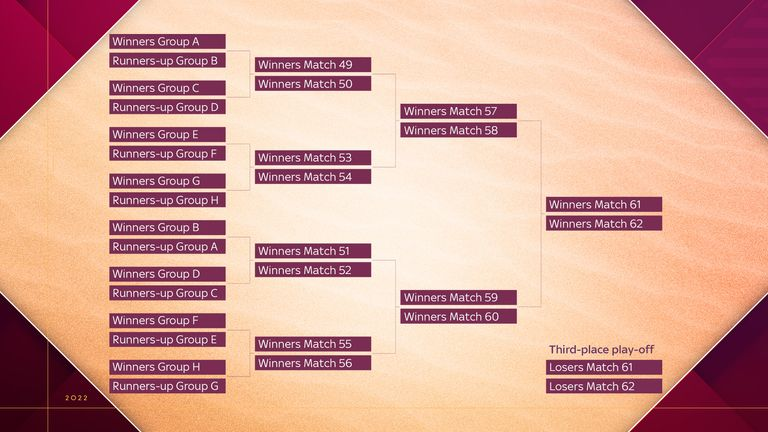

In [450]:
merged_df = combined.merge(filtered_df[["date","home_team","away_team","result","target"]], left_index = True, right_index = True)


In [451]:
merged_df

,actual,prediction,date,home_team,away_team,result,target
3598,0,0,2022-11-20,Qatar,Ecuador,L,0
3601,0,0,2022-11-21,United States,Wales,D,0
3600,1,0,2022-11-21,England,Iran,W,1
3599,0,0,2022-11-21,Senegal,Netherlands,L,0
3605,1,0,2022-11-22,France,Australia,W,1
3603,0,0,2022-11-22,Mexico,Poland,D,0
3602,0,1,2022-11-22,Argentina,Saudi Arabia,L,0
3604,0,0,2022-11-22,Denmark,Tunisia,D,0
3609,1,1,2022-11-23,Belgium,Canada,W,1
3608,0,0,2022-11-23,Morocco,Croatia,D,0


In [452]:
groups

[['Qatar', 'Ecuador', 'Senegal', 'Netherlands'],
 ['England', 'Iran', 'United States', 'Wales'],
 ['Argentina', 'Saudi Arabia', 'Mexico', 'Poland'],
 ['France', 'Australia', 'Denmark', 'Tunisia'],
 ['Japan', 'Spain', 'Germany', 'Costa Rica'],
 ['Morocco', 'Croatia', 'Belgium', 'Canada'],
 ['Brazil', 'Switzerland', 'Cameroon', 'Serbia'],
 ['Portugal', 'Ghana', 'Uruguay', 'South Korea']]

### Using the results from the model, we can deduce the qualifying teams by the top two in each group (i.e most points). Using data from FIFA, i.e Winner of Group A, plays runner up in Group B, Winner of Group B plays runner up in Group A. We extract the teams and match pairings as seen below

## Round of 16

In [453]:
round_of_16 = ['Netherlands','Senegal','Iran','United States','Argentina','Mexico','France','Australia'
                ,'Japan','Costa Rica','Morocco','Belgium','Brazil','Serbia','Portugal','South Korea']

In [454]:
import pandas as pd

teams = round_of_16

# Initialize an empty list to store the results
rows = []

# Loop through the teams and filter the original dataframe for each team
for team in teams:
    # Filter the dataframe to get only rows where the home_team_name matches the home_team column
    new_df = team_average_df[team_average_df['home_team'] == team]

    # Sort the filtered dataframe by the date column in descending order to get the most recent row first
    sorted_df = new_df.sort_values(by='date', ascending=False)

    # Get the most recent row by selecting the first row of the sorted dataframe
    most_recent_row = sorted_df.iloc[0]

    # Append the most recent row to the list of results
    rows.append(most_recent_row)

# Create a new dataframe from the list of results
df_teams = pd.DataFrame(rows)

# Print the new dataframe
df_teams


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points,previous_points,rank,rank_change,result,goal_diff,away_team_code,target,home_score_rolling,away_score_rolling,goal_diff_rolling
3655,2022-12-09,Netherlands,Argentina,2,2,FIFA World Cup,Lusail,Qatar,True,1773.88,1770.65,3.0,0.0,D,0,8,0,1.666667,0.666667,1.000000
3599,2022-11-21,Senegal,Netherlands,0,2,FIFA World Cup,Doha,Qatar,True,1694.51,1679.41,8.0,0.0,L,2,125,0,1.666667,0.333333,1.333333
3633,2022-11-29,Iran,United States,0,1,FIFA World Cup,Doha,Qatar,True,1627.48,1635.01,16.0,2.0,L,1,188,0,0.666667,1.000000,1.000000
3601,2022-11-21,United States,Wales,1,1,FIFA World Cup,Al Rayyan,Qatar,True,1569.82,1582.13,19.0,0.0,D,0,194,0,2.666667,0.000000,2.666667
3666,2022-12-18,Argentina,France,3,3,FIFA World Cup,Lusail,Qatar,True,1759.78,1764.85,4.0,0.0,D,0,65,0,2.333333,0.333333,2.000000
3603,2022-11-22,Mexico,Poland,0,0,FIFA World Cup,Doha,Qatar,True,1548.59,1546.18,26.0,0.0,D,0,142,0,2.333333,1.666667,2.000000
3661,2022-12-14,France,Morocco,2,0,FIFA World Cup,Al Khor,Qatar,True,1563.50,1558.35,22.0,-1.0,W,2,120,1,3.000000,1.000000,2.000000
3636,2022-11-30,Australia,Denmark,1,0,FIFA World Cup,Al Wakrah,Qatar,True,1666.57,1665.47,10.0,0.0,W,1,49,1,1.000000,0.333333,0.666667
3650,2022-12-05,Japan,Croatia,1,1,FIFA World Cup,Al Wakrah,Qatar,True,1645.64,1632.15,12.0,-3.0,D,0,44,0,1.000000,1.333333,1.000000
3639,2022-12-01,Costa Rica,Germany,2,4,FIFA World Cup,Al Khor,Qatar,True,1650.21,1658.96,11.0,0.0,L,2,69,0,1.666667,0.333333,1.333333


In [460]:
round16 = pd.read_csv("round_of_16.csv")
round16

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points,...,rank,rank_change,result,goal_diff,away_team_code,target,home_score_rolling,away_score_rolling,Unnamed: 19,goal_diff_rolling
0,12/3/2022,Netherlands,United States,0,0,FIFA World Cup,Lusail,Qatar,True,1773.88,...,3,0,D,0,8,0,1.666667,0.666667,NaN,1.00000
1,12/3/2022,Argentina,Australia,0,3,FIFA World Cup,Lusail,Qatar,True,1759.78,...,4,0,D,0,65,0,2.333333,0.333333,NaN,2.00000
2,12/4/2022,Costa Rica,Morocco,0,4,FIFA World Cup,Al Khor,Qatar,True,1650.21,...,11,0,L,2,69,0,1.666667,0.333333,NaN,1.33333
3,12/4/2022,Brazil,South Korea,4,1,FIFA World Cup,Doha,Qatar,True,1530.30,...,28,0,W,3,163,1,2.666667,0.333333,NaN,2.33333
4,12/5/2022,Iran,Sengal,0,1,FIFA World Cup,Doha,Qatar,True,1627.48,...,16,2,L,1,188,0,0.666667,1.000000,NaN,1.00000
5,12/5/2022,France,Mexico,2,0,FIFA World Cup,Al Khor,Qatar,True,1563.50,...,22,-1,W,2,120,1,3.000000,1.000000,NaN,2.00000
6,12/6/2022,Belgium,Japan,0,2,FIFA World Cup,Doha,Qatar,True,1563.50,...,22,-1,L,2,120,0,3.000000,0.666667,NaN,2.33330
7,12/6/2022,Portugal,Serbia,6,1,FIFA World Cup,Lusail,Qatar,True,1635.92,...,15,-1,W,5,170,1,3.000000,0.666667,NaN,2.33330


In [461]:
def make_predictions(data,data2, predictors):
    
    train = data[data["date"] < '2022-11-01']
    test = data2
    rf.fit(train[predictors], train["target"])
    preds = rf.predict(test[predictors])
    combined = pd.DataFrame(dict(actual=test["target"], prediction=preds), index=test.index)
    #precision = precision_score(test["target"], preds)
    precision_score(test["target"], preds, average='micro')
    accuracy = accuracy_score(test["target"],preds)
    return combined, precision, accuracy

In [462]:
combined, precision, accuracy = make_predictions(team_average_df,round16, predictors + new_cols)

In [465]:
merged_df = combined.merge(round16[["date","home_team","away_team"]], left_index = True, right_index = True)

In [466]:
merged_df

,actual,prediction,date,home_team,away_team
0,0,0,12/3/2022,Netherlands,United States
1,0,0,12/3/2022,Argentina,Australia
2,0,1,12/4/2022,Costa Rica,Morocco
3,1,1,12/4/2022,Brazil,South Korea
4,0,0,12/5/2022,Iran,Sengal
5,1,1,12/5/2022,France,Mexico
6,0,1,12/6/2022,Belgium,Japan
7,1,1,12/6/2022,Portugal,Serbia


## Quarter Finals

In [472]:
quarter_final = pd.read_csv("quarter_final.csv")
quarter_final

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points,...,rank,rank_change,result,goal_diff,away_team_code,target,home_score_rolling,away_score_rolling,Unnamed: 19,goal_diff_rolling
0,12/9/2022,Netherlands,Argentina,0,0,FIFA World Cup,Lusail,Qatar,True,1773.88,...,3,0,D,0,8,0,1.666667,0.666667,NaN,1.00000
1,12/9/2022,Costa Rica,Brazil,0,4,FIFA World Cup,Al Khor,Qatar,True,1650.21,...,11,0,L,2,69,0,1.666667,0.333333,NaN,1.33333
2,12/9/2022,France,Sengal,2,0,FIFA World Cup,Al Khor,Qatar,True,1563.50,...,22,-1,W,2,120,1,3.000000,1.000000,NaN,2.00000
3,12/6/2022,Portugal,Belgium,6,1,FIFA World Cup,Lusail,Qatar,True,1635.92,...,15,-1,W,5,170,1,3.000000,0.666667,NaN,2.33330


In [473]:
combined, precision, accuracy = make_predictions(team_average_df,quarter_final, predictors + new_cols)

In [475]:
merged_df = combined.merge(quarter_final[["date","home_team","away_team"]], left_index = True, right_index = True)
merged_df

,actual,prediction,date,home_team,away_team
0,0,0,12/9/2022,Netherlands,Argentina
1,0,1,12/9/2022,Costa Rica,Brazil
2,1,1,12/9/2022,France,Sengal
3,1,1,12/6/2022,Portugal,Belgium


## Semi Final

In [476]:
semi_final = pd.read_csv("semi_final.csv")
semi_final

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points,...,rank,rank_change,result,goal_diff,away_team_code,target,home_score_rolling,away_score_rolling,Unnamed: 19,goal_diff_rolling
0,12/3/2022,Argentina,Brazil,0,3,FIFA World Cup,Lusail,Qatar,True,1759.78,...,4,0,D,0,65,0,2.333333,0.333333,NaN,2
1,12/9/2022,France,Portugal,2,0,FIFA World Cup,Al Khor,Qatar,True,1563.50,...,22,-1,W,2,120,1,3.000000,1.000000,NaN,2


In [477]:
combined, precision, accuracy = make_predictions(team_average_df,semi_final, predictors + new_cols)

In [478]:
merged_df = combined.merge(semi_final[["date","home_team","away_team"]], left_index = True, right_index = True)
merged_df

,actual,prediction,date,home_team,away_team
0,0,0,12/3/2022,Argentina,Brazil
1,1,1,12/9/2022,France,Portugal


## Final

In [479]:
final = pd.read_csv("final.csv")
final

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points,...,rank,rank_change,result,goal_diff,away_team_code,target,home_score_rolling,away_score_rolling,Unnamed: 19,goal_diff_rolling
0,12/18/2022,Argentina,France,0,3,FIFA World Cup,Lusail,Qatar,True,1759.78,...,4,0,D,0,65,0,2.333333,0.333333,NaN,2


In [480]:
combined, precision, accuracy = make_predictions(team_average_df,final, predictors + new_cols)

In [481]:
merged_df = combined.merge(final[["date","home_team","away_team"]], left_index = True, right_index = True)
merged_df

,actual,prediction,date,home_team,away_team
0,0,0,12/18/2022,Argentina,France


## Using my method of handling draws/penalties, Argentina is the higher rank and hence will give the edge towards my model, hence Argentina is seen to be the winner of my FIFA World Cup Machine Learning Model.

# CONCLUSION

## My model successfully predicted the winner of the FIFA World Cup 2022, that is Argentina. However, there is always room for improvement and my model can be enhanced given more data about the game such as all time data of, goals scored, goals conceded, possession, free kicks, penalties scored, yellow cards, red cards just to name a few. The more parameters obtained from the data, the more precise and accurate the model can be. Overal, with a 68% precision and a 71% accuracy, my model did not that bad. Hopefully I can test it with the upcoming World Cup in 2026.